# preprocessing

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import random
np.random.seed(42)
random.seed(42)
import statsmodels.api as sm
from scipy.stats import ttest_ind

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving dataset arkansas by myself.csv to dataset arkansas by myself (1).csv


In [ ]:
df = pd.read_csv('dataset arkansas by myself.csv')
df.head()



,Sample ID,Age,Label,Jitter (local),Jitter ddp(%),Shimmer local(%),Shimmer dda(%),Shimmer(dB),Shimmer APQ3(%),Shimmer APQ5(%),...,MFCC3,MFCC4,MFCC5,MFCC6,MFCC7,MFCC8,MFCC9,MFCC10,MFCC11,MFCC12
0,AH_064F_7AB034C9-72E4-438B-A9B3-AD7FDA1596C5,69,0,0.41,0.61,3.89,6.57,0.340,2.19,2.58,...,-96.438440,-27.956131,-5.374026,-48.672127,14.406999,2.435826,-33.177383,11.156488,5.229769,-6.708691
1,AH_114S_A89F3548-0B61-4770-B800-2E26AB3908B6,43,0,0.59,0.95,9.03,14.00,0.775,4.67,5.82,...,-70.111496,-24.304478,3.932895,-41.759540,3.259878,4.690951,-23.609083,2.527178,-0.801593,-9.001701
2,AH_121A_BD5BA248-E807-4CB9-8B53-47E7FFE5F8E2,18,0,0.51,0.87,4.74,7.86,0.414,2.62,3.29,...,-63.527317,-15.014873,2.571514,-36.723186,14.314400,8.136821,-27.558716,1.453599,-1.727923,-18.760218
3,AH_123G_559F0706-2238-447C-BA39-DB5933BA619D,28,0,0.46,0.76,5.62,8.94,0.491,2.98,3.54,...,-79.562874,-9.637963,6.504622,-49.684498,13.514963,9.138590,-31.739088,4.450940,3.487808,-8.733847
4,AH_195B_39DA6A45-F4CC-492A-80D4-FB79049ACC22,68,0,0.44,0.62,7.37,11.96,0.628,3.99,4.89,...,-91.538510,-21.122873,-8.612599,-52.667625,25.749784,15.876921,-40.066517,1.912060,10.494533,-9.673373


In [ ]:
df.shape

(81, 33)

In [ ]:
df.describe()

,Age,Label,Jitter (local),Jitter ddp(%),Shimmer local(%),Shimmer dda(%),Shimmer(dB),Shimmer APQ3(%),Shimmer APQ5(%),Mean NHR,...,MFCC3,MFCC4,MFCC5,MFCC6,MFCC7,MFCC8,MFCC9,MFCC10,MFCC11,MFCC12
count,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,...,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000
mean,57.283951,0.493827,0.624198,1.009506,6.767778,10.556296,0.673494,3.519136,4.335185,0.022679,...,-72.889067,-17.368801,-2.063048,-41.601588,17.221125,8.922890,-29.081114,5.911549,2.150097,-14.954871
std,15.391747,0.503077,0.442786,0.787709,3.036588,4.680224,0.670196,1.560417,1.961456,0.022888,...,25.191299,13.413671,14.675171,13.804819,10.652324,8.603055,7.747544,7.625230,6.022619,8.334701
min,18.000000,0.000000,0.010000,0.010000,3.230000,4.450000,0.281000,1.480000,2.020000,0.002000,...,-132.886930,-40.624800,-32.559868,-81.838120,-12.371778,-13.927407,-48.556080,-18.195595,-17.045364,-38.829308
25%,44.000000,0.000000,0.400000,0.590000,4.470000,7.080000,0.394000,2.360000,2.790000,0.008000,...,-93.060280,-25.990301,-12.829611,-48.746680,10.614345,2.988624,-34.205240,1.033861,-0.874818,-19.655973
50%,58.000000,0.000000,0.500000,0.780000,5.840000,8.940000,0.505000,2.980000,3.600000,0.016000,...,-71.242850,-19.408869,-4.226351,-40.786450,18.533266,7.598000,-28.868580,4.450940,2.585060,-14.817467
75%,69.000000,1.000000,0.710000,1.170000,8.470000,13.890000,0.786000,4.630000,5.460000,0.025000,...,-53.929016,-9.637963,6.872439,-31.272013,24.983423,14.757364,-24.730536,11.726673,6.151954,-9.040260
max,85.000000,1.000000,3.130000,5.690000,19.310000,28.780000,6.123000,9.600000,12.140000,0.149000,...,-18.822361,32.181830,37.213080,-13.229027,39.872520,28.275597,-4.037788,25.463013,13.224677,5.699036


In [ ]:
df.sum()

,0
Sample ID,AH_064F_7AB034C9-72E4-438B-A9B3-AD7FDA1596C5AH...
Age,4640
Label,40
Jitter (local),50.56
Jitter ddp(%),81.77
Shimmer local(%),548.19
Shimmer dda(%),855.06
Shimmer(dB),54.553
Shimmer APQ3(%),285.05
Shimmer APQ5(%),351.15


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Sample ID         81 non-null     object 
 1   Age               81 non-null     int64  
 2   Label             81 non-null     int64  
 3   Jitter (local)    81 non-null     float64
 4   Jitter ddp(%)     81 non-null     float64
 5   Shimmer local(%)  81 non-null     float64
 6   Shimmer dda(%)    81 non-null     float64
 7   Shimmer(dB)       81 non-null     float64
 8   Shimmer APQ3(%)   81 non-null     float64
 9   Shimmer APQ5(%)   81 non-null     float64
 10  Mean NHR          81 non-null     float64
 11  HNR(DB)           81 non-null     float64
 12  pitch             81 non-null     float64
 13  Intensity (Db)    81 non-null     float64
 14  Formant 1(HZ)     81 non-null     float64
 15  Formant 2(HZ)     81 non-null     float64
 16  Formant 3(HZ)     81 non-null     float64
 17 

In [ ]:
df['Label'].value_counts()

,count
Label,
0,41
1,40


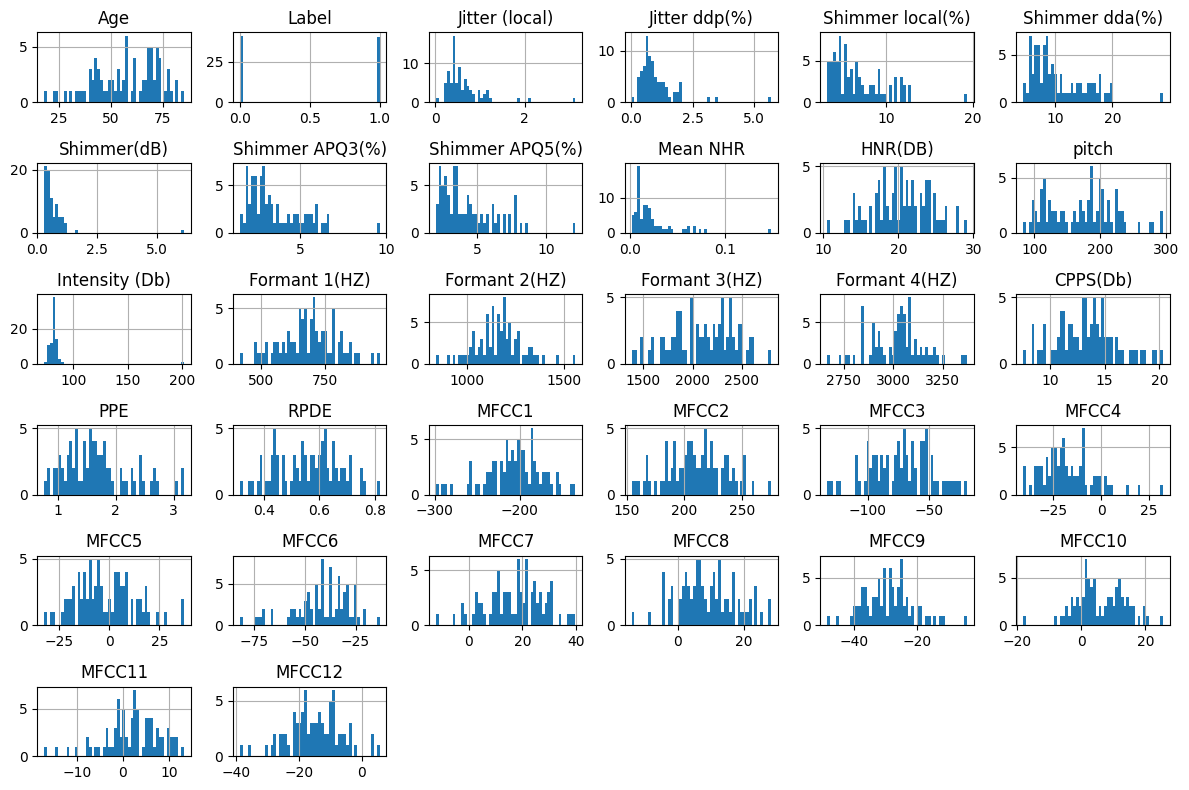

In [ ]:
df.hist(bins=50, figsize=(12, 8))
plt.tight_layout()
plt.show()

In [ ]:
x=df.drop(['Label','Sample ID'], axis=1)
y=df['Label']

In [ ]:
column_labels = df.columns
print(column_labels)

Index(['Sample ID', 'Age', 'Label', 'Jitter (local)', 'Jitter ddp(%)',
       'Shimmer local(%)', 'Shimmer dda(%)', 'Shimmer(dB)', 'Shimmer APQ3(%)',
       'Shimmer APQ5(%)', 'Mean NHR', 'HNR(DB)', 'pitch', 'Intensity (Db)',
       'Formant 1(HZ)', 'Formant 2(HZ)', 'Formant 3(HZ)', 'Formant 4(HZ)',
       'CPPS(Db)', 'PPE', 'RPDE', 'MFCC1', 'MFCC2', 'MFCC3', 'MFCC4', 'MFCC5',
       'MFCC6', 'MFCC7', 'MFCC8', 'MFCC9', 'MFCC10', 'MFCC11', 'MFCC12'],
      dtype='object')


In [ ]:
x

,Age,Jitter (local),Jitter ddp(%),Shimmer local(%),Shimmer dda(%),Shimmer(dB),Shimmer APQ3(%),Shimmer APQ5(%),Mean NHR,HNR(DB),...,MFCC3,MFCC4,MFCC5,MFCC6,MFCC7,MFCC8,MFCC9,MFCC10,MFCC11,MFCC12
0,69,0.41,0.61,3.89,6.57,0.340,2.19,2.58,0.008,21.500,...,-96.438440,-27.956131,-5.374026,-48.672127,14.406999,2.435826,-33.177383,11.156488,5.229769,-6.708691
1,43,0.59,0.95,9.03,14.00,0.775,4.67,5.82,0.014,20.561,...,-70.111496,-24.304478,3.932895,-41.759540,3.259878,4.690951,-23.609083,2.527178,-0.801593,-9.001701
2,18,0.51,0.87,4.74,7.86,0.414,2.62,3.29,0.006,26.308,...,-63.527317,-15.014873,2.571514,-36.723186,14.314400,8.136821,-27.558716,1.453599,-1.727923,-18.760218
3,28,0.46,0.76,5.62,8.94,0.491,2.98,3.54,0.008,23.888,...,-79.562874,-9.637963,6.504622,-49.684498,13.514963,9.138590,-31.739088,4.450940,3.487808,-8.733847
4,68,0.44,0.62,7.37,11.96,0.628,3.99,4.89,0.019,18.184,...,-91.538510,-21.122873,-8.612599,-52.667625,25.749784,15.876921,-40.066517,1.912060,10.494533,-9.673373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,58,0.77,1.42,6.78,11.11,0.638,3.70,4.02,0.018,18.355,...,-63.997684,-14.565191,-9.697307,-30.913168,30.623135,2.608398,-37.540962,9.953406,3.327865,-18.424402
77,73,0.28,0.41,6.00,8.56,0.502,2.85,3.73,0.022,19.252,...,-37.832832,-15.128313,-21.164091,-43.030582,18.717264,17.194056,-24.741644,-2.701011,6.257259,-4.577129
78,43,0.29,0.46,3.66,5.66,0.332,1.89,2.26,0.012,21.274,...,-129.118940,-11.985052,37.213080,-30.257710,4.424608,2.395254,-12.800766,20.276070,-17.045364,-35.685387
79,48,0.71,1.19,5.54,8.73,0.478,2.91,3.46,0.023,21.175,...,-51.670357,-1.850596,6.872439,-40.786450,10.706111,5.796264,-33.073364,-6.447478,-1.034893,-2.229762


In [ ]:
y

,Label
0,0
1,0
2,0
3,0
4,0
...,...
76,1
77,1
78,1
79,1


In [ ]:
x=np.array(x)
y=np.array(y)

In [ ]:
x

array([[ 69.        ,   0.41      ,   0.61      , ...,  11.156488  ,
          5.2297688 ,  -6.7086906 ],
       [ 43.        ,   0.59      ,   0.95      , ...,   2.5271783 ,
         -0.80159277,  -9.001701  ],
       [ 18.        ,   0.51      ,   0.87      , ...,   1.4535992 ,
         -1.7279235 , -18.760218  ],
       ...,
       [ 43.        ,   0.29      ,   0.46      , ...,  20.27607   ,
        -17.045364  , -35.685387  ],
       [ 48.        ,   0.71      ,   1.19      , ...,  -6.4474783 ,
         -1.0348926 ,  -2.229762  ],
       [ 81.        ,   0.68      ,   1.05      , ...,   9.21745   ,
          9.718395  , -17.869576  ]])

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
from sklearn.preprocessing import StandardScaler
scalor=StandardScaler()
x=scalor.fit_transform(x)

In [ ]:
x

array([[ 0.76593304, -0.48676333, -0.51033512, ...,  0.69212573,
         0.51453696,  0.99554367],
       [-0.93380877, -0.0777138 , -0.07601407, ..., -0.44660385,
        -0.49315427,  0.71871342],
       [-2.5681759 , -0.25951359, -0.17820726, ..., -0.58827408,
        -0.64792121, -0.45941146],
       ...,
       [-0.93380877, -0.75946302, -0.70194734, ...,  1.89555197,
        -3.2070864 , -2.50275092],
       [-0.60693535,  0.19498589,  0.23056549, ..., -1.63090564,
        -0.5321329 ,  1.53627514],
       [ 1.55042926,  0.12681097,  0.05172742, ...,  0.43624895,
         1.2644753 , -0.35188616]])

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
x=df.drop(['Label','Sample ID'],axis=1)
y=df['Label']

# Split data into two groups based on the label (0: Healthy, 1: Parkinson)
healthy_group = x[df['Label'] == 0]
parkinson_group = x[df['Label'] == 1]

# Perform t-test for each feature
t_test_results = []
for column in x.columns:
    t_stat, p_value = ttest_ind(healthy_group[column], parkinson_group[column], equal_var=False)
    t_test_results.append({"Feature": column, "T-Statistic": t_stat, "P-Value": p_value})

# Convert results to a DataFrame
t_test_results_df = pd.DataFrame(t_test_results)

# Sort features by p-value (ascending) to identify the most significant features
t_test_results_df = t_test_results_df.sort_values(by="P-Value")

# Display top results
#t_test_results_df.head()
t_test_results


[{'Feature': 'Age',
  'T-Statistic': np.float64(-7.292324458358657),
  'P-Value': np.float64(4.3348912939106005e-10)},
 {'Feature': 'Jitter (local)',
  'T-Statistic': np.float64(1.4859348377448929),
  'P-Value': np.float64(0.1425029961908492)},
 {'Feature': 'Jitter ddp(%)',
  'T-Statistic': np.float64(1.420944726853142),
  'P-Value': np.float64(0.16043104077858958)},
 {'Feature': 'Shimmer local(%)',
  'T-Statistic': np.float64(0.820422980547738),
  'P-Value': np.float64(0.4147443919771773)},
 {'Feature': 'Shimmer dda(%)',
  'T-Statistic': np.float64(0.9812093226399072),
  'P-Value': np.float64(0.32978396993770975)},
 {'Feature': 'Shimmer(dB)',
  'T-Statistic': np.float64(1.287602780043061),
  'P-Value': np.float64(0.20456359657294543)},
 {'Feature': 'Shimmer APQ3(%)',
  'T-Statistic': np.float64(0.9787946767793186),
  'P-Value': np.float64(0.3309677292506533)},
 {'Feature': 'Shimmer APQ5(%)',
  'T-Statistic': np.float64(1.171586898965528),
  'P-Value': np.float64(0.2453473404230015)},


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
x_train.shape,y_train.shape

((64, 31), (64,))

In [ ]:
x_test.shape,y_test.shape

((17, 31), (17,))

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
n_split=5
from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import log_loss
kf=StratifiedKFold(n_splits=n_split,shuffle=True)

# models

## Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_rf=RandomForestClassifier(n_estimators=200,max_depth=10,min_samples_split=2)
model_rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, n_estimators=200)

In [ ]:

y_pred_train_rf=model_rf.predict(x_train)
y_pred_test_rf=model_rf.predict(x_test)


In [ ]:
cv_scores = cross_val_score(model_rf, x, y, cv=5, scoring='accuracy')
print("Average Cross-Validation Accuracy:", cv_scores.mean())
print("Accuracy scores:", cv_scores)
print("Mean accuracy_rf:", cv_scores.mean())
print("Standard deviation_accu_rf:", cv_scores.std())


Average Cross-Validation Accuracy: 0.8272058823529411
Accuracy scores: [0.82352941 1.         0.875      0.75       0.6875    ]
Mean accuracy_rf: 0.8272058823529411
Standard deviation_accu_rf: 0.10736301322614106


In [ ]:
cv_scores = cross_val_score(model_rf, x, y, cv=5, scoring='recall')
print("Average Cross-Validation recall:", cv_scores.mean())
print("recall scores:", cv_scores)
print("Mean recall_rf:", cv_scores.mean())
print("Standard deviation_recall_rf:", cv_scores.std())

Average Cross-Validation recall: 0.75
recall scores: [0.875 1.    0.625 0.625 0.625]
Mean recall_rf: 0.75
Standard deviation_recall_rf: 0.15811388300841897


In [ ]:
cv_scores = cross_val_score(model_rf, x, y, cv=5, scoring='precision')
print("Average Cross-Validation precision:", cv_scores.mean())
print("precision:", cv_scores)
print("Mean precision_rf:", cv_scores.mean())
print("Standard deviation_pre_rf:", cv_scores.std())

Average Cross-Validation precision: 0.8257142857142858
precision: [0.7        1.         1.         0.71428571 0.71428571]
Mean precision_rf: 0.8257142857142858
Standard deviation_pre_rf: 0.1423992662214527


In [ ]:
cv_scores = cross_val_score(model_rf, x, y, cv=5, scoring='f1')
print("Average Cross-Validation F1-score:", cv_scores.mean())
print("F1 scores:", cv_scores)
print("Mean F1-score_rf:", cv_scores.mean())
print("Standard deviation_f1_rf:", cv_scores.std())


In [ ]:


cv_scores = cross_val_score(model_rf, x, y, cv=5, scoring='roc_auc')
print("Average Cross-Validation ROC-AUC:", cv_scores.mean())
print("ROC-AUC scores:", cv_scores)
print("Mean ROC-AUC_rf:", cv_scores.mean())
print("Standard deviatio_roc_rf:", cv_scores.std())


In [ ]:
# Perform cross-validation for log-loss
cv_scores = cross_val_score(model_rf, x, y, cv=5, scoring='neg_log_loss')

# Convert negative log-loss to positive log-loss
positive_log_loss = -cv_scores

# Print results
print("Cross-Validation Log-Loss (positive):", positive_log_loss)
print("Average Log-Loss_rf:", positive_log_loss.mean())
print("Standard Deviation of Log-los_rf:", positive_log_loss.std())


In [ ]:
cv_scores = cross_val_score(model_rf, x, y, cv=5, scoring='neg_mean_squared_error')

# Convert negative MSE to positive MSE
positive_mse = -cv_scores

# Print results
print("Cross-Validation MSE (positive):", positive_mse)
print("Average MSE_rf:", positive_mse.mean())
print("Standard Deviation of MSE_rf:", positive_mse.std())


In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,mean_squared_error,precision_score,roc_auc_score,f1_score,log_loss

In [ ]:
confusion_matrix(y_train,y_pred_train_rf)


In [ ]:
confusion_matrix(y_test,y_pred_test_rf)

In [ ]:
acc_train_rf=accuracy_score(y_train,y_pred_train_rf)
acc_test_rf=accuracy_score(y_test,y_pred_test_rf)
acc_train_rf,acc_test_rf

In [ ]:
rec_train_rf=recall_score(y_train,y_pred_train_rf)
rec_test_rf=recall_score(y_test,y_pred_test_rf)
rec_train_rf,rec_test_rf

In [ ]:
mse_train_rf=mean_squared_error(y_train,y_pred_train_rf)
mse_test_rf=mean_squared_error(y_test,y_pred_test_rf)
mse_train_rf,mse_test_rf

In [ ]:
f1_train_rf = f1_score(y_train, y_pred_train_rf)
f1_test_rf = f1_score(y_test, y_pred_test_rf)
f1_train_rf,f1_test_rf

In [ ]:
prec_train_rf=precision_score(y_train,y_pred_train_rf)
prec_test_rf=precision_score(y_test,y_pred_test_rf)
prec_train_rf,prec_test_rf

In [ ]:
roc_au_train_rf=roc_auc_score(y_train,y_pred_train_rf)
roc_au_test_rf=roc_auc_score(y_test,y_pred_test_rf)
roc_au_train_rf,roc_au_test_rf

In [ ]:
bce=log_loss(y_test,y_pred_test_rf)
bce

In [ ]:
from sklearn.naive_bayes import GaussianNB

NB=GaussianNB(var_smoothing=1e-09)
NB.fit(x_train,y_train)

In [ ]:
y_pred_train_NB=NB.predict(x_train)
y_pred_test_NB=NB.predict(x_test)

In [ ]:
cv_scores = cross_val_score(NB, x, y, cv=5, scoring='accuracy')
print("Average Cross-Validation Accuracy:", cv_scores.mean())
print("Accuracy scores:", cv_scores)
print("Mean accuracy_NB:", cv_scores.mean())
print("Standard deviation_accu_NB:", cv_scores.std())

In [ ]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(NB, x, y, cv=5, scoring='recall')
print("Average Cross-Validation recall:", cv_scores.mean())
print("recall scores:", cv_scores)
print("Mean recall_NB:", cv_scores.mean())
print("Standard deviation_recall_NB:", cv_scores.std())

In [ ]:
cv_scores = cross_val_score(NB, x, y, cv=5, scoring='precision')
print("Average Cross-Validation precision:", cv_scores.mean())
print("precision scores:", cv_scores)
print("Mean precision_NB:", cv_scores.mean())
print("Standard deviation_prec_NB:", cv_scores.std())


In [ ]:
cv_scores = cross_val_score(NB, x, y, cv=5, scoring='f1')
print("Average Cross-Validation F1-score:", cv_scores.mean())
print("F1 scores:", cv_scores)
print("Mean F1-score_NB:", cv_scores.mean())
print("Standard deviation_f1_NB:", cv_scores.std())


In [ ]:

cv_scores = cross_val_score(NB, x, y, cv=5, scoring='roc_auc')
print("Average Cross-Validation ROC-AUC:", cv_scores.mean())
print("ROC-AUC scores:", cv_scores)
print("Mean ROC-AUC_NB:", cv_scores.mean())
print("Standard deviation_roc_NB:", cv_scores.std())


In [ ]:
cv_scores = cross_val_score(NB, x, y, cv=5, scoring='neg_log_loss')

# Convert negative log-loss to positive log-loss
positive_log_loss = -cv_scores

# Print results
print("Cross-Validation Log-Loss (positive):", positive_log_loss)
print("Average Log-Loss_NB:", positive_log_loss.mean())
print("Standard Deviation of Log-Loss_NB:", positive_log_loss.std())

In [ ]:
cv_scores = cross_val_score(NB, x, y, cv=5, scoring='neg_mean_squared_error')

# Convert negative MSE to positive MSE
positive_mse = -cv_scores

# Print results
print("Cross-Validation MSE (positive):", positive_mse)
print("Average MSE_NB:", positive_mse.mean())
print("Standard Deviation of MSE_NB:", positive_mse.std())


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score,recall_score,precision_score,mean_squared_error,roc_auc_score,f1_score

In [ ]:
confusion_matrix(y_train,y_pred_train_NB)

In [ ]:
confusion_matrix(y_test,y_pred_test_NB)

In [ ]:
acc_train_NB=accuracy_score(y_train,y_pred_train_NB)
acc_test_NB=accuracy_score(y_test,y_pred_test_NB)
acc_train_NB,acc_test_NB

In [ ]:
rec_train_NB=recall_score(y_train,y_pred_train_NB)
rec_test_NB=recall_score(y_test,y_pred_test_NB)
rec_train_NB,rec_test_NB

In [ ]:
pre_train_NB=precision_score(y_train,y_pred_train_NB)
pre_test_NB=precision_score(y_test,y_pred_test_NB)
pre_train_NB,pre_test_NB

In [ ]:
mse_train_NB=mean_squared_error(y_train,y_pred_train_NB)
mse_test_NB=mean_squared_error(y_test,y_pred_test_NB)
mse_train_NB,mse_test_NB

In [ ]:
roc_au_test_NB=roc_auc_score(y_test,y_pred_test_NB)
roc_au_test_NB

In [ ]:
f1_train_NB = f1_score(y_train, y_pred_train_NB)
f1_test_NB = f1_score(y_test, y_pred_test_NB)
f1_train_NB,f1_test_NB

#KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(algorithm='brute', n_neighbors=7,weights='uniform')
knn.fit(x_train,y_train)

In [ ]:
y_pred_train_knn=knn.predict(x_train)
y_pred_test_knn=knn.predict(x_test)

In [ ]:
cv_scores = cross_val_score(knn, x, y, cv=5, scoring='accuracy')
print("Average Cross-Validation Accuracy:", cv_scores.mean())
print("Accuracy scores:", cv_scores)
print("Mean accuracy_knn:", cv_scores.mean())
print("Standard deviation_acc_knn:", cv_scores.std())

In [ ]:
cv_scores = cross_val_score(knn, x, y, cv=5, scoring='recall')
print("Average Cross-Validation recall:", cv_scores.mean())
print("recall scores:", cv_scores)
print("Mean recall_knn:", cv_scores.mean())
print("Standard deviation_recall_knn:", cv_scores.std())

In [ ]:
cv_scores = cross_val_score(knn, x, y, cv=5, scoring='precision')
print("Average Cross-Validation precision:", cv_scores.mean())
print("precision:", cv_scores)
print("Mean precision_knn:", cv_scores.mean())
print("Standard deviation_prec_knn:", cv_scores.std())


In [ ]:
cv_scores = cross_val_score(knn, x, y, cv=5, scoring='f1')
print("Average Cross-Validation F1-score:", cv_scores.mean())
print("F1 scores:", cv_scores)
print("Mean F1-score_knn:", cv_scores.mean())
print("Standard deviation_f1_knn:", cv_scores.std())


In [ ]:


cv_scores = cross_val_score(knn, x, y, cv=5, scoring='roc_auc')
print("Average Cross-Validation ROC-AUC:", cv_scores.mean())
print("ROC-AUC scores:", cv_scores)
print("Mean ROC-AUC_knn:", cv_scores.mean())
print("Standard deviation_roc_knn:", cv_scores.std())


In [ ]:
v_scores = cross_val_score(knn, x, y, cv=5, scoring='neg_log_loss')

# Convert negative log-loss to positive log-loss
positive_log_loss = -cv_scores

# Print results
print("Cross-Validation Log-Loss (positive):", positive_log_loss)
print("Average Log-Loss_knn:", positive_log_loss.mean())
print("Standard Deviation of Log-Loss_knn:", positive_log_loss.std())

In [ ]:
cv_scores = cross_val_score(knn, x, y, cv=5, scoring='neg_mean_squared_error')

# Convert negative MSE to positive MSE
positive_mse = -cv_scores

# Print results
print("Cross-Validation MSE (positive):", positive_mse)
print("Average MSE_knn:", positive_mse.mean())
print("Standard Deviation of MSE_knn:", positive_mse.std())


In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,mean_squared_error,precision_score,roc_auc_score,f1_score

In [ ]:
confusion_matrix(y_train,y_pred_train_knn)

In [ ]:
confusion_matrix(y_test,y_pred_test_knn)

In [ ]:
acc_train_knn=accuracy_score(y_train,y_pred_train_knn)
acc_test_knn=accuracy_score(y_test,y_pred_test_knn)
acc_train_knn,acc_test_knn

In [ ]:
rec_train_knn=recall_score(y_train,y_pred_train_knn)
rec_test_knn=recall_score(y_test,y_pred_test_knn)
rec_train_knn,rec_test_knn

In [ ]:
mse_train_knn=mean_squared_error(y_train,y_pred_train_knn)
mse_test_knn=mean_squared_error(y_test,y_pred_test_knn)
mse_train_knn,mse_test_knn

In [ ]:
roc_au_train_knn=roc_auc_score(y_train,y_pred_train_knn)
roc_au_test_knn=roc_auc_score(y_test,y_pred_test_knn)
roc_au_train_knn,roc_au_test_knn

In [ ]:
prec_train_knn=precision_score(y_train,y_pred_train_knn)
prec_test_knn=precision_score(y_test,y_pred_test_knn)
prec_train_knn,prec_test_knn

In [ ]:
f1_train_knn = f1_score(y_train, y_pred_train_knn)
f1_test_knn = f1_score(y_test, y_pred_test_knn)
f1_train_knn,f1_test_knn

# decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_dt=DecisionTreeClassifier(max_depth=8, min_samples_leaf=2, min_samples_split=4)
model_dt.fit(x_train,y_train)

In [ ]:
y_pred_train_dt=model_dt.predict(x_train)
y_pred_test_dt=model_dt.predict(x_test)

In [ ]:
cv_scores = cross_val_score(model_dt, x, y, cv=5, scoring='accuracy')
print("Average Cross-Validation Accuracy:", cv_scores.mean())
print("Accuracy scores:", cv_scores)
print("Mean accuracy_dt:", cv_scores.mean())
print("Standard deviation_accu_dt:", cv_scores.std())

In [ ]:
cv_scores = cross_val_score(model_dt, x, y, cv=5, scoring='recall')
print("Average Cross-Validation recall:", cv_scores.mean())
print("recall scores:", cv_scores)
print("Mean recall_dt:", cv_scores.mean())
print("Standard deviation_recall_dt:", cv_scores.std())

In [ ]:
cv_scores = cross_val_score(model_dt, x, y, cv=5, scoring='precision')
print("Average Cross-Validation precision:", cv_scores.mean())
print("precision:", cv_scores)
print("Mean precision_dt:", cv_scores.mean())
print("Standard deviation_dt_prec:", cv_scores.std())


In [ ]:
cv_scores = cross_val_score(model_dt, x, y, cv=5, scoring='f1')
print("Average Cross-Validation F1-score:", cv_scores.mean())
print("F1 scores:", cv_scores)
print("Mean F1-score_dt:", cv_scores.mean())
print("Standard deviation_dt_f1:", cv_scores.std())


In [ ]:


cv_scores = cross_val_score(model_dt, x, y, cv=5, scoring='roc_auc')
print("Average Cross-Validation ROC-AUC:", cv_scores.mean())
print("ROC-AUC scores:", cv_scores)
print("Mean ROC-AUC_dt:", cv_scores.mean())
print("Standard deviation_dt_roc:", cv_scores.std())


In [ ]:
v_scores = cross_val_score(model_dt, x, y, cv=5, scoring='neg_log_loss')

# Convert negative log-loss to positive log-loss
positive_log_loss = -cv_scores

# Print results
print("Cross-Validation Log-Loss (positive):", positive_log_loss)
print("Average Log-Loss_dt:", positive_log_loss.mean())
print("Standard Deviation of Log-Loss_dt:", positive_log_loss.std())

In [ ]:
cv_scores = cross_val_score(model_dt, x, y, cv=5, scoring='neg_mean_squared_error')

# Convert negative MSE to positive MSE
positive_mse = -cv_scores

# Print results
print("Cross-Validation MSE (positive):", positive_mse)
print("Average MSE_dt:", positive_mse.mean())
print("Standard Deviation of MSE_dt:", positive_mse.std())

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,mean_squared_error,precision_score,roc_auc_score,f1_score

In [ ]:
confusion_matrix(y_train,y_pred_train_dt)

In [ ]:
confusion_matrix(y_test,y_pred_test_dt)

In [ ]:
acc_train_dt=accuracy_score(y_train,y_pred_train_dt)
acc_test_dt=accuracy_score(y_test,y_pred_test_dt)
acc_train_dt,acc_test_dt

In [ ]:
prec_train_dt=precision_score(y_train,y_pred_train_dt)
prec_test_dt=precision_score(y_test,y_pred_test_dt)
prec_train_dt,prec_test_dt

In [ ]:
roc_au_train_dt=roc_auc_score(y_train,y_pred_train_dt)
roc_au_test_dt=roc_auc_score(y_test,y_pred_test_dt)
roc_au_train_dt,roc_au_test_dt

In [ ]:
rec_train_dt=recall_score(y_train,y_pred_train_dt)
rec_test_dt=recall_score(y_test,y_pred_test_dt)
rec_train_dt,rec_test_dt

In [ ]:
mse_train_dt=mean_squared_error(y_train,y_pred_train_dt)
mse_test_dt=mean_squared_error(y_test,y_pred_test_dt)
mse_train_dt,mse_test_dt

In [ ]:
f1_train_dt = f1_score(y_train, y_pred_train_dt)
f1_test_dt = f1_score(y_test, y_pred_test_dt)
f1_train_dt,f1_test_dt

# SVM

In [ ]:
from sklearn.svm import SVC
model_svm=SVC(C=10, gamma=0.1, kernel='linear')
model_svm.fit(x_train,y_train)

In [ ]:
y_pred_train_svm=model_svm.predict(x_train)
y_pred_test_svm=model_svm.predict(x_test)

In [ ]:
cv_scores = cross_val_score(model_svm, x, y, cv=5, scoring='accuracy')
print("Average Cross-Validation accuracy:", cv_scores.mean())
print("accuracy scores:", cv_scores)
print("Mean accuracy_svm:", cv_scores.mean())
print("Standard deviation_svm_accu:", cv_scores.std())

In [ ]:
cv_scores = cross_val_score(model_svm, x, y, cv=5, scoring='recall')
print("Average Cross-Validation recall:", cv_scores.mean())
print("recall scores:", cv_scores)
print("Mean recall_svm:", cv_scores.mean())
print("Standard deviation_svm_recall:", cv_scores.std())

In [ ]:
cv_scores = cross_val_score(model_svm, x, y, cv=5, scoring='precision')
print("Average Cross-Validation precision:", cv_scores.mean())
print("precision:", cv_scores)
print("Mean precision_svm:", cv_scores.mean())
print("Standard deviation_prec_svm:", cv_scores.std())


In [ ]:
cv_scores = cross_val_score(model_svm, x, y, cv=5, scoring='f1')
print("Average Cross-Validation F1-score:", cv_scores.mean())
print("F1 scores:", cv_scores)
print("Mean F1-score_svm:", cv_scores.mean())
print("Standard deviation_svm_f1:", cv_scores.std())


In [ ]:


cv_scores = cross_val_score(model_svm, x, y, cv=5, scoring='roc_auc')
print("Average Cross-Validation ROC-AUC:", cv_scores.mean())
print("ROC-AUC scores:", cv_scores)
print("Mean ROC-AUC_svm:", cv_scores.mean())
print("Standard deviation_roc_svm:", cv_scores.std())


In [ ]:
cv_scores = cross_val_score(model_svm, x, y, cv=5, scoring='neg_mean_squared_error')

# Convert negative MSE to positive MSE
positive_mse = -cv_scores

# Print results
print("Cross-Validation MSE (positive):", positive_mse)
print("Average MSE_svm:", positive_mse.mean())
print("Standard Deviation of MSE_svm:", positive_mse.std())

In [ ]:
v_scores = cross_val_score(model_svm, x, y, cv=5, scoring='neg_log_loss')

# Convert negative log-loss to positive log-loss
positive_log_loss = -cv_scores

# Print results
print("Cross-Validation Log-Loss (positive):", positive_log_loss)
print("Average Log-Loss_svm:", positive_log_loss.mean())
print("Standard Deviation of Log-Loss_svm:", positive_log_loss.std())

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,mean_squared_error,precision_score,roc_auc_score,f1_score

In [ ]:
confusion_matrix(y_train,y_pred_train_svm)

In [ ]:
confusion_matrix(y_test,y_pred_test_svm)

In [ ]:
acc_train_svm=accuracy_score(y_train,y_pred_train_svm)
acc_test_svm=accuracy_score(y_test,y_pred_test_svm)
acc_train_svm,acc_test_svm

In [ ]:
prec_train_svm=precision_score(y_train,y_pred_train_svm)
prec_test_svm=precision_score(y_test,y_pred_test_svm)
prec_train_svm,prec_test_svm

In [ ]:
rec_train_svm=recall_score(y_train,y_pred_train_svm)
rec_test_svm=recall_score(y_test,y_pred_test_svm)
rec_train_svm,rec_test_svm

In [ ]:
mse_train_svm=mean_squared_error(y_train,y_pred_train_svm)
mse_test_svm=mean_squared_error(y_test,y_pred_test_svm)
mse_train_svm,mse_test_svm

In [ ]:
roc_au_train_svm=roc_auc_score(y_train,y_pred_train_svm)
roc_au_test_svm=roc_auc_score(y_test,y_pred_test_svm)
roc_au_train_svm,roc_au_test_svm

In [ ]:
f1_train_svm = f1_score(y_train, y_pred_train_svm)
f1_test_svm = f1_score(y_test, y_pred_test_svm)
f1_train_svm,f1_test_svm


# logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
model_lr=LogisticRegression(C=10, penalty='l1', solver='liblinear')
model_lr.fit(x_train,y_train)

In [ ]:
y_pred_train_lr=model_lr.predict(x_train)
y_pred_test_lr=model_lr.predict(x_test)

In [ ]:
cv_scores = cross_val_score(model_lr, x, y, cv=5, scoring='accuracy')
print("Average Cross-Validation Accuracy:", cv_scores.mean())
print("Accuracy scores:", cv_scores)
print("Mean accuracy_lr:", cv_scores.mean())
print("Standard deviation_lr_accu:", cv_scores.std())

In [ ]:
cv_scores = cross_val_score(model_lr, x, y, cv=5, scoring='recall')
print("Average Cross-Validation recall:", cv_scores.mean())
print("recall scores:", cv_scores)
print("Mean recall_lr:", cv_scores.mean())
print("Standard deviation_recall_lr:", cv_scores.std())

In [ ]:
cv_scores = cross_val_score(model_lr, x, y, cv=5, scoring='precision')
print("Average Cross-Validation precision:", cv_scores.mean())
print("precision:", cv_scores)
print("Mean precision_lr:", cv_scores.mean())
print("Standard deviation_prec_lr:", cv_scores.std())


In [ ]:
cv_scores = cross_val_score(model_lr, x, y, cv=5, scoring='f1')
print("Average Cross-Validation F1-score:", cv_scores.mean())
print("F1 scores:", cv_scores)
print("Mean F1-score_lr:", cv_scores.mean())
print("Standard deviation_lr_f1:", cv_scores.std())


In [ ]:


cv_scores = cross_val_score(model_lr, x, y, cv=5, scoring='roc_auc')
print("Average Cross-Validation ROC-AUC:", cv_scores.mean())
print("ROC-AUC scores:", cv_scores)
print("Mean ROC-AUC_lr:", cv_scores.mean())
print("Standard deviation_lr_roc:", cv_scores.std())


In [ ]:
v_scores = cross_val_score(model_lr, x, y, cv=5, scoring='neg_log_loss')

# Convert negative log-loss to positive log-loss
positive_log_loss = -cv_scores

# Print results
print("Cross-Validation Log-Loss (positive):", positive_log_loss)
print("Average Log-Loss_lr:", positive_log_loss.mean())
print("Standard Deviation of Log-Loss_lr:", positive_log_loss.std())

In [ ]:
cv_scores = cross_val_score(model_lr, x, y, cv=5, scoring='neg_mean_squared_error')

# Convert negative MSE to positive MSE
positive_mse = -cv_scores

# Print results
print("Cross-Validation MSE (positive):", positive_mse)
print("Average MSE_lr:", positive_mse.mean())
print("Standard Deviation of MSE_lr:", positive_mse.std())

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,mean_squared_error,precision_score,roc_auc_score,f1_score

In [ ]:
confusion_matrix(y_test,y_pred_test_lr)

In [ ]:
confusion_matrix(y_train,y_pred_train_lr)

In [ ]:
acc_train_lr=accuracy_score(y_train,y_pred_train_lr)
acc_test_lr=accuracy_score(y_test,y_pred_test_lr)
acc_train_lr,acc_test_lr

In [ ]:
rec_train_lr=recall_score(y_train,y_pred_train_lr)
rec_test_lr=recall_score(y_test,y_pred_test_lr)
rec_train_lr,rec_test_lr

In [ ]:
mse_train_lr=mean_squared_error(y_train,y_pred_train_lr)
mse_test_lr=mean_squared_error(y_test,y_pred_test_lr)
mse_train_lr,mse_test_lr

In [ ]:
prec_train_dt=precision_score(y_train,y_pred_train_dt)
prec_test_dt=precision_score(y_test,y_pred_test_dt)
prec_train_dt,prec_test_dt

In [ ]:
roc_au_train_lr=roc_auc_score(y_train,y_pred_train_lr)
roc_au_test_lr=roc_auc_score(y_test,y_pred_test_lr)
roc_au_train_lr,roc_au_test_lr

In [ ]:
f1_train_lr = f1_score(y_train, y_pred_train_lr)
f1_test_lr = f1_score(y_test, y_pred_test_lr)
f1_train_lr,f1_test_lr

# ANN

In [ ]:
from sklearn.neural_network import MLPClassifier
model_ann=MLPClassifier(activation='logistic', hidden_layer_sizes=(50, 50),learning_rate_init=0.1, max_iter=150, solver='sgd')
model_ann.fit(x_train,y_train)

In [ ]:
y_pred_train_ann=model_ann.predict(x_train)
y_pred_test_ann=model_ann.predict(x_test)

In [ ]:
cv_scores = cross_val_score(model_ann, x, y, cv=5, scoring='accuracy')
print("Average Cross-Validation Accuracy:", cv_scores.mean())
print("Accuracy scores:", cv_scores)
print("Mean accuracy_ann:", cv_scores.mean())
print("Standard deviation_ann_accu:", cv_scores.std())

In [ ]:
cv_scores = cross_val_score(model_ann, x, y, cv=5, scoring='recall')
print("Average Cross-Validation recall:", cv_scores.mean())
print("recall scores:", cv_scores)
print("Mean recall_ann:", cv_scores.mean())
print("Standard deviation_ann_recall:", cv_scores.std())

In [ ]:
cv_scores = cross_val_score(model_ann, x, y, cv=5, scoring='precision')
print("Average Cross-Validation precision:", cv_scores.mean())
print("precision:", cv_scores)
print("Mean precision_ann:", cv_scores.mean())
print("Standard deviation_pre_ann:", cv_scores.std())


In [ ]:
cv_scores = cross_val_score(model_ann, x, y, cv=5, scoring='f1')
print("Average Cross-Validation F1-score:", cv_scores.mean())
print("F1 scores:", cv_scores)
print("Mean F1-score_ann:", cv_scores.mean())
print("Standard deviation_ann_f1:", cv_scores.std())


In [ ]:


cv_scores = cross_val_score(model_ann, x, y, cv=5, scoring='roc_auc')
print("Average Cross-Validation ROC-AUC:", cv_scores.mean())
print("ROC-AUC scores:", cv_scores)
print("Mean ROC-AUC_ann:", cv_scores.mean())
print("Standard deviation_ann_roc:", cv_scores.std())


In [ ]:
v_scores = cross_val_score(model_ann, x, y, cv=5, scoring='neg_log_loss')

# Convert negative log-loss to positive log-loss
positive_log_loss = -cv_scores

# Print results
print("Cross-Validation Log-Loss (positive):", positive_log_loss)
print("Average Log-Loss_ann:", positive_log_loss.mean())
print("Standard Deviation of Log-Loss_ann:", positive_log_loss.std())

In [ ]:
cv_scores = cross_val_score(model_ann, x, y, cv=5, scoring='neg_mean_squared_error')

# Convert negative MSE to positive MSE
positive_mse = -cv_scores

# Print results
print("Cross-Validation MSE (positive):", positive_mse)
print("Average MSE_ann:", positive_mse.mean())
print("Standard Deviation of MSE_ann:", positive_mse.std())

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,mean_squared_error,precision_score,roc_auc_score,f1_score

In [ ]:
confusion_matrix(y_train,y_pred_train_ann)

In [ ]:
confusion_matrix(y_test,y_pred_test_ann)

In [ ]:
acc_train_ann=accuracy_score(y_train,y_pred_train_ann)
acc_test_ann=accuracy_score(y_test,y_pred_test_ann)
acc_train_ann,acc_test_ann

In [ ]:
rec_train_ann=recall_score(y_train,y_pred_train_ann)
rec_test_ann=recall_score(y_test,y_pred_test_ann)
rec_train_ann,rec_test_ann

In [ ]:
mse_train_ann=mean_squared_error(y_train,y_pred_train_ann)
mse_test_ann=mean_squared_error(y_test,y_pred_test_ann)
mse_train_ann,mse_test_ann

In [ ]:
prec_train_ann=precision_score(y_train,y_pred_train_ann)
prec_test_ann=precision_score(y_test,y_pred_test_ann)
prec_train_ann,prec_test_ann

In [ ]:
roc_au_train_ann=roc_auc_score(y_train,y_pred_train_ann)
roc_au_test_ann=roc_auc_score(y_test,y_pred_test_ann)
roc_au_train_ann,roc_au_test_ann

In [ ]:
f1_train_ann = f1_score(y_train, y_pred_train_ann)
f1_test_ann = f1_score(y_test, y_pred_test_ann)
f1_train_ann,f1_test_ann

In [ ]:
# @title Default title text
import pandas as pd

# Example metrics (replace these variables with your actual calculated metrics)
Mean_accuracy_rf = 0.8272058823529411  # Accuracy for Random Forest
Mean_recall_rf = 0.75                 # Recall for Random Forest
Mean_precision_rf = 0.8257142857142858  # Precision for Random Forest
Mean_ROC_AUC_rf = 0.8965277777777778   # ROC-AUC for Random Forest
Mean_F1_score_rf = 0.8250877192982455  # F1-Score for Random Forest
Average_MSE_rf = 0.17279411764705882   # MSE for Random Forest

# Naive Bayes
Mean_accuracy_NB = 0.7397058823529411
Mean_recall_NB = 0.825
Mean_precision_NB = 0.7312121212121212
Mean_ROC_AUC_NB = 0.811111111111111
Mean_F1_score_NB = 0.7578137651821862
Average_MSE_NB = 0.26029411764705884

# K-Nearest Neighbors
Mean_accuracy_knn = 0.6301470588235294
Mean_recall_knn = 0.7
Mean_precision_knn = 0.62222222222221
Mean_ROC_AUC_knn = 0.6760416666666667
Mean_F1_score_knn = 0.6492623716153129
Average_MSE_knn = 0.36985294117647055

# Decision Tree
Mean_accuracy_dt = 0.6801470588235294
Mean_recall_dt = 0.775
Mean_precision_dt = 0.787142857142858
Mean_ROC_AUC_dt = 0.8071180555555555
Mean_F1_score_dt = 0.6589165220744169
Average_MSE_dt = 0.24558823529411766

# Support Vector Machine
Mean_accuracy_svm = 0.752941176705882
Mean_recall_svm = 0.775
Mean_precision_svm = 0.7528571428571429
Mean_ROC_AUC_svm = 0.82638888888889
Mean_F1_score_svm = 0.75888888888889
Average_MSE_svm = 0.24

# Logistic Regression
Mean_accuracy_lr = 0.7529411764705882
Mean_recall_lr = 0.775
Mean_precision_lr = 0.7466666666666666
Mean_ROC_AUC_lr = 0.8131944444444444
Mean_F1_score_lr = 0.7487161531279178
Average_MSE_lr = 0.2720588235294118

# Artificial Neural Network
Mean_accuracy_ann = 0.505882352941176
Mean_recall_ann = 0.2
Mean_precision_ann = 0.09411764705882353
Mean_ROC_AUC_ann = 0.526736111111111
Mean_F1_score_ann = 0.0
Average_MSE_ann = 0.5058823529411764

# Create a dictionary to store the metrics for all algorithms
results = {
    "Algorithm": [
        "Random Forest", "Naive Bayes", "K-Nearest Neighbors", "Decision Tree",
        "Support Vector Machine", "Logistic Regression", "Artificial Neural Network"
    ],
    "Accuracy": [
        Mean_accuracy_rf, Mean_accuracy_NB, Mean_accuracy_knn, Mean_accuracy_dt,
        Mean_accuracy_svm, Mean_accuracy_lr, Mean_accuracy_ann
    ],
    "Recall": [
        Mean_recall_rf, Mean_recall_NB, Mean_recall_knn, Mean_recall_dt,
        Mean_recall_svm, Mean_recall_lr, Mean_recall_ann
    ],
    "Precision": [
        Mean_precision_rf, Mean_precision_NB, Mean_precision_knn, Mean_precision_dt,
        Mean_precision_svm, Mean_precision_lr, Mean_precision_ann
    ],
    "Average MSE": [
        Average_MSE_rf, Average_MSE_NB, Average_MSE_knn, Average_MSE_dt,
        Average_MSE_svm, Average_MSE_lr, Average_MSE_ann
    ],
    "F1-Score": [
        Mean_F1_score_rf, Mean_F1_score_NB, Mean_F1_score_knn, Mean_F1_score_dt,
        Mean_F1_score_svm, Mean_F1_score_lr, Mean_F1_score_ann
    ],
    "ROC-AUC Score": [
        Mean_ROC_AUC_rf, Mean_ROC_AUC_NB, Mean_ROC_AUC_knn, Mean_ROC_AUC_dt,
        Mean_ROC_AUC_svm, Mean_ROC_AUC_lr, Mean_ROC_AUC_ann
    ]
}

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Save the DataFrame to a CSV file
results_df.to_csv("algorithm_metrics_crossvalidation_updated.csv", index=False)

print("Results saved to 'algorithm_metrics_crossvalidation_updated.csv'.")
